# Regularization

### Overfitting and Occam's Razor

In the last subject, we discussed model complexity and the ability to generalize from data. We saw two cases.

- Underfitting - the model is too simple and fails to fit the data/signal
- Overfitting - the model is too complex and fits the noise in addition to the signal

In this subject, we will see how to control **overfitting using regularization**. But first, **let's talk about Occam's razor** which is the basic idea behind it, but also an interesting principle in general.

### Occam's razor
Occam's razor is a principle which states that if multiple solutions are available, the simplest one is better than the others. **The idea is that it's easy to build overly complicated solutions with ad-hoc rules that don't generalize well.**

In the context of machine learning, the principle says that we should prefer simpler models unless we are sure that the complex ones are necessary.

We often say that generalization is the central goal of machine learning. Occam's razor is one of the important principles to achieve this. You can take a look at section 3 and 4 of the paper "A few useful things to know about machine learning" by Pedro Domingos to learn more about the intuition behind generalization. Here is the link to the google scholar page. https://scholar.google.ch/scholar?cluster=4404716649035182981&hl=en&as_sdt=0,5

### Increasing the amount of data
The amount of data also plays a role in the under-/overfitting balance. Let's do a quick experiment. In this image, we show two polynomial regressions of degree 9 fitted to 10 and 80 data points from the same source of data.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3734/data-size.svg

In the first case, the model is strongly overfitting. In fact, the polynomial passes through each data point. The problem is lessened in the second case.

### Summary
In this unit, we learned about Occam's razor which is an important principle in machine learning. In the next unit, we will learn about regularization which is an efficient way to reduce overfitting.


# Regularziation

In practice, we use regularization to fight overfitting. In this unit, we will see the basic idea behind it. We will then implement regularization with Scikit-learn in the next unit.

### L2 Regularization

hen fitting a model, we are searching for a set of optimal parameters 
⃗
w
 that minimize the loss function 
L
(
⃗
w
)
.

As you can see, there are **no constraints on the parameters**
⃗
w
. 
In particular, **they can get very large as long as they minimize the loss function.** However, **large coefficients is one of the symptoms of overfitting.** **With large coefficients, a small variation in the input data has a big effect on the predictions.**

The idea behind **regularization is to add a constraint on the value of the parameters**. In practice, we include a penalization term in the cost function that measures how large the parameters are. For instance, 
L
2
 regularization measures the squares of the parameters 
w
i
.

minL(⃗w)+α * ∑w2i

When 
α
 tends toward zero, the constraint on the parameters vanishes, and the problem is the same as before. When 
α
 tends toward infinity, the 
L
(
⃗
w
)
 term becomes irrelevant compared to the 
L
2
 one. In this case, all parameters are zero except the intercept term 
w
0
.

### Geometrical interpretation

*Note: it's not necessary to understand the mathematics behind this - here, we introduce this geometrical interpretation because it can help us visualize the effect of regularization. However, if you are curious about the maths behind this interpretation and want to learn more about Lagrange multipliers, you can take a look a this excellent tutorial from khanacademy.org.*

In practice, we never use this formulation to fit our models. However, it's useful because it provides a nice geometrical interpretation - For a model with two parameters 
w
1
 and 
w
2
, we are searching for a point inside a circle of radius 
c
. In three dimensions, we are searching for a set of values inside a sphere of radius 
c
. Here is an illustration of the two-dimensional case.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/2938/regularization-geometrical-interpretation.svg

In this image, the blue point outside the circle represents the parameters 
w
1
 and 
w
2
 that minimize the unconstrained loss value 
L
(
⃗
w
)
. This minimal value is not inside the circle of radius 
c
. Hence it's not a valid solution according to the constraint. The solution that minimizes the cost function inside the gray circle is denoted 
w
∗
 (
w
 star).
 
 ### Other regularizers
 
 We will use 
L
2
 regularization in this course, but there are other regularizers. For instance, the **lasso regularization 
L
1
 is a variant of 
L
2**
 which penalizes the absolute value of the coefficients instead of their squares.
 
 https://d7whxh71cqykp.cloudfront.net/uploads/image/data/2937/l1-regularization.svg
 
 In other words, with 
L
1
 regularization, the optimal solution only has a few non-zero parameters, and we say that the solution is sparse which is a desired property in some cases. You can take a look at this thread if you want to learn more about this topic.
 https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when/answer/Xavier-Amatriain

### Summary
Let's summarize what we've learned in this unit. Here are a few takeaways.

- The idea behind regularization is to add a **constraint** on the amplitude of the coefficients.
- This constraint corresponds to an additional term in the cost function called the **penalization term.**
- We use an alpha 
α
 parameter to control the **regularization strength.**

In the next unit, we will implement 
L
2
 regularization for linear regressions.

### Ridge Regression

 the last unit, we learned about 
L
2
 regularization and saw that it adds a constraint on the length of the vector of parameters 
⃗
w
. So far, **we didn't specify any particular model or cost function**, but if we use **multi-linear regressions and minimize the squares of the residuals**, we obtain the ridge regression model.

Ridge = LinearRegression(RSS) + alpha x sum(w2)
$$
\min_{\vec{w}}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}+\alpha\sum_{j=1}^{p}w_{j}^{2}
$$

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('data-points.csv')

# Print shape
print('Shape:', data_df.shape) # (50, 2)

# First five rows
data_df.head()

Shape: (50, 2)


,x,y
0,0.000,0.706
1,0.128,0.288
2,0.256,0.645
3,0.385,1.272
4,0.513,1.238


We generated the 50 x/y data points using a sine curve. The idea is to create 50 points on the curve and add a small noise to each point. Let's create the x, y variables and plot the data.

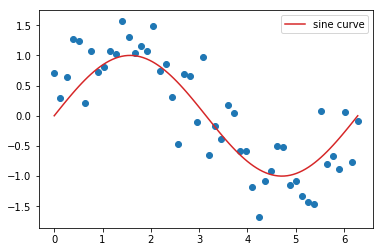

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Extract x, y data
x = data_df.x.values
y = data_df.y.values

# Plot data points
plt.scatter(x, y)

# Plot sine curve for reference
x_values = np.linspace(min(x), max(x), num=100)
y_sine = np.sin(x_values)
plt.plot(x_values, y_sine, c='C3', label='sine curve')
plt.legend()
plt.show()

### Polynomial regression
Let's fit a polynomial regression of degree 10 to this set of points. We can generate the polynomial features using the PolynomialFeatures object from Scikit-learn.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print('Shape:', X_poly.shape) # (50, 10)
print('Features:', poly_obj.get_feature_names())


Shape: (50, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Later in this unit, we will **apply regularization** to our models. Since regularization is sensitive to the scale of our features, we will **start by standardizing** our data.

**This is a common operation in machine learning, so Scikit-learn implements a StandardScaler() object to do it.** Let's see how to use to it.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_poly)

In this code, we first have to create the object and then call its fit_transform() function to compute the mean/standard deviation of each feature (fit) and apply standardization (transform).

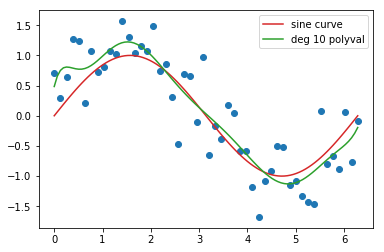

In [37]:
# Try polyfit (test LO)

import numpy as np

coefs = np.polyfit(x, y, deg=10)
y_pred = np.polyval(coefs, x_values)

plt.scatter(x, y)
plt.plot(x_values, y_sine, c='C3', label='sine curve')
plt.plot(x_values, y_pred, c='C2', label='deg 10 polyval')
plt.legend()
plt.show()

In [28]:
# Let's verify that the data is standardized. The mean should be close to zero.
X_rescaled.mean(axis=0)

array([ 1.06581410e-16,  3.10862447e-16, -2.66453526e-16, -9.76996262e-17,
       -1.33226763e-16,  6.21724894e-17, -6.21724894e-17,  1.33226763e-16,
       -5.32907052e-17, -5.32907052e-17])

In [29]:
X_rescaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Let's now fit a linear regression to the standardize data and plot its prediction curve.

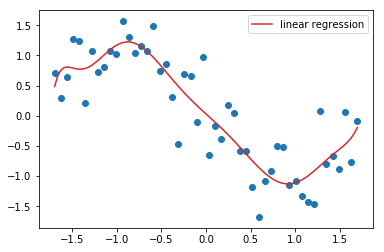

In [36]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_rescaled, y)

# Pass sample x values through the preprocessing steps
X_values_rescaled = scaler.transform(
    poly_obj.transform(x_values[:, np.newaxis])
)
y_values_lr = lr.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lr, c='C3', label='linear regression')
plt.legend()
plt.show()

Note that we need to **apply all the preprocessing steps to the hundred x_values** used to plot the prediction curve: we first create the polynomial basis with **poly_obj.transform()** and then standardize the features with **scaler.transform()** to get the X_values_rescaled. We can then pass the results to our model to get the predictions y_values_lr.

**As we can see, the model is clearly overfitting. Let's try to reduce overfitting with regularization**

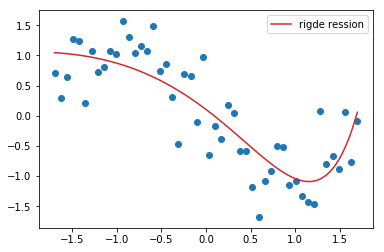

In [38]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_rescaled, y)

# Compute predictions
y_values_ridge = ridge.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge, c='C3', label='rigde ression')
plt.legend()
plt.show()

**In this code, we replaced the LinearRegression object with a Ridge one. The rest of the code is the same. We get the following curve.**

By default, the Ridge object sets the regularization strength 
α
 to one. In our case, the curve is too rigid to model the data points, and the **model is underfitting.**

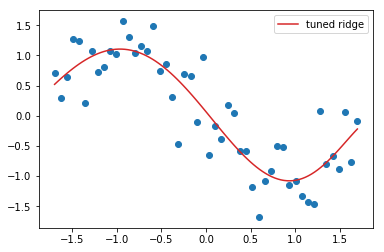

In [39]:
# Ridge regression
ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_rescaled, y)

# Compute predictions
y_values_ridge2 = ridge2.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge2, c='C3', label='tuned ridge')
plt.legend()
plt.show()

We can also compare the coefficients before and after adding the regularization term using the coef_ attribute.

In [40]:
# Linear regression coefficients
features = poly_obj.get_feature_names()
for feature, coef in zip(features, lr.coef_):
    print('{:<6}: {:>10.1f}'.format(feature, coef))

x0    :        6.3
x0^2  :     -156.5
x0^3  :     1604.8
x0^4  :    -8250.8
x0^5  :    24145.5
x0^6  :   -42951.3
x0^7  :    47245.0
x0^8  :   -31285.6
x0^9  :    11373.1
x0^10 :    -1731.0


In [41]:
# Ridge regression coefficients
for feature, coef in zip(features, ridge2.coef_):
    print('{:<6}: {:>4.1f}'.format(feature, coef))

x0    :  1.4
x0^2  : -1.6
x0^3  : -6.8
x0^4  :  3.9
x0^5  :  4.5
x0^6  :  0.5
x0^7  : -1.7
x0^8  : -1.1
x0^9  :  0.2
x0^10 :  0.1


In [44]:
print(coefs) # pour polyval pour comparer

[-8.28558459e-05  3.31715754e-03 -5.54271454e-02  5.06585154e-01
 -2.77594378e+00  9.36408351e+00 -1.91184441e+01  2.21740200e+01
 -1.30201562e+01  3.42498798e+00  4.84685671e-01]


As we can see, the coefficients are much smaller with ridge regression than with linear regression.

Using the analogy from the previous unit, the coefficients of the linear regression model minimize the loss function 
$
L
(
⃗
w
)
$
 in blue. On the other hand, the coefficients of the ridge regression model correspond to the optimal solution $w∗$
 inside the circle of radius 
$c$
https://d7whxh71cqykp.cloudfront.net/uploads/image/data/2931/regularization-geometrical-interpretation.svg

### Lasso regressions
One of the advantages of using Scikit-learn is that it's easy to test different estimators. For instance, we can change the regularization to 
$L
1$
 using the Lasso estimator.

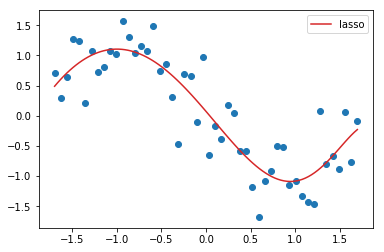

In [45]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4, max_iter=1e5)
lasso.fit(X_rescaled, y)

# Compute predictions
y_values_lasso = lasso.predict(X_values_rescaled)

# Plot the model
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lasso, c='C3', label='lasso')
plt.legend()
plt.show()

In this code, we simply replaced the Ridge object by a Lasso one. Scikit-learn uses an iterative algorithm called coordinate descent to find the optimal parameters of the Lasso regression. For this reason, we need to set the number of iterations with max_iter. We will simply set it to 100k iterations.

We get the result.

The curve is very similar to the ridge one. However, the coefficients are different. In the last unit, we saw that 
$L
1$
 regularization produces *sparse solutions* which means that only a few parameters are non-zero. We can verify that by printing the coefficients of the lasso estimator.

In [47]:
# Lasso regression coefficients
for feature, coef in zip(features, lasso.coef_):
    print('{:<6}: {:>4.1f}'.format(feature, coef))


x0    :  1.8
x0^2  : -4.4
x0^3  : -0.2
x0^4  :  0.0
x0^5  :  2.2
x0^6  :  0.9
x0^7  :  0.0
x0^8  :  0.0
x0^9  : -0.0
x0^10 : -0.7


In this case, **only six coefficients are non-zero.** This is why **we say that Lasso performs feature selection** - it automatically selects a subset of the features to make predictions and sets the others coefficients to zero.

### Summary

In this unit, **we applied regularization to reduce overfitting** of a polynomial regression model. However, it can help in many other situations. For instance, **we saw in a previous unit that we can use it when there is ill-conditioning**.

In the next unit, we will see how to tune the regularization term 
$α$
 using a simple algorithm called **grid search.**

### Notes : scale vs StandardScaler
They both come from the preprocessing module and do the same job (see example below) but with some differences. The scale is just a function to transform the data whereas StandardScaler implements the Transformer API for a training set and is able to apply the same transformation on the testing set. In ML modeling where we always have train and test sets we need to use the latter one.

In [51]:
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

# Load the data from the units
data_df = pd.read_csv('bike-sharing.csv')

# Standardize x
x_standardized     = scale(data_df['temp'])
x_standardized_new = StandardScaler().fit_transform(data_df['temp'].values.reshape(-1, 1))


print('scale:          Mean:', x_standardized.mean(),'Standard deviation:', x_standardized.std())
print('StandardScaler: Mean:', x_standardized_new.mean(),'Standard deviation:', x_standardized_new.std())



scale:          Mean: -2.9160440592069775e-16 Standard deviation: 0.9999999999999999
StandardScaler: Mean: -2.9160440592069775e-16 Standard deviation: 0.9999999999999999


**I wonder why this is the case. What is the difference between scaler.transform(X) and scaler.fit_transform(X)?**

very good question. When you create an object, like the scaler scaler = StandardScaler(), then the object is still "empty". **Meaning, it doesn't know yet which mean to take to centralize the data or which scale to use to scale the data.** On the help page of StandardScaler, you can see after the list of Parameters that it also includes a list of Attributes. All of these attributes end with an underscore _ which means that these parameters are only available once the object was fitted or correctly initiated.

# Tuning hyperparameters with grid search

Regularization adds a new parameter - the **regularization strength**. Unlike model coefficients which are learned during training, we set its value before fitting the model. For this reason, it's called a **hyperparameter**. In this unit, we will see how to tune it using a simple technique called **grid search**.

### House prices data set

In [52]:
import pandas as pd

# Load the data
data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


The data contains information about different house sales including the size of the house (number of rooms, lot size), the sale type/condition and the price.

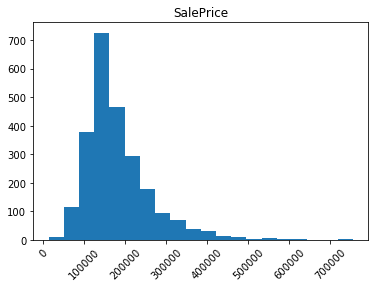

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

data_df.hist(column='SalePrice', bins=20, grid=False, xrot=45)
plt.show()

Most of the houses in the data set have a price between 100 and 300 thousand dollars. However, there are a few expensive houses with prices well above that. In practice, this can lead to biased models that favor accurate predictions of expensive houses, i.e., a 10% error on a 500 thousand dollars house is equivalent to a 20% error on a 250 thousand dollars one.

To avoid building a model that is biased toward more expensive houses, we will apply the **logarithm transformation** and build a model that predicts the log of the sale price.

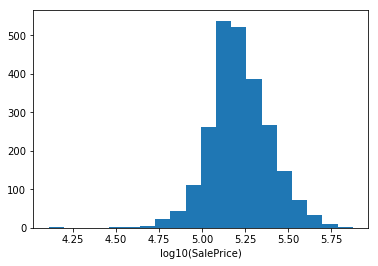

In [56]:
import numpy as np

plt.hist(np.log10(data_df.SalePrice), bins=20)
plt.xlabel('log10(SalePrice)')
plt.show()

### Preprocessing the data

As often, the raw data isn't ready for our machine learning algorithms. **In the final project, you will work on this house prices data set and apply all the necessary data cleaning.** 

However, for this unit, we will apply the **minimal steps**: 
- encoding non-numerical entries with one-hot encoding
- replacing missing entries with the median value.

Let's create a preprocess(df) function to perform those steps.

In [57]:
def preprocess(df):
    # Work on a copy
    df = df.copy()

    # One-hot encoding
    df = pd.get_dummies(df, dummy_na=True)

    # Fill missing values
    for c in df.columns:
        df[c] = df[c].fillna(df[c].median())

    return df

preprocessed_df = preprocess(data_df)
preprocessed_df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_VWD,Sale Type_WD,Sale Type_nan,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Sale Condition_nan
0,484,528275070,60,68.0,8795,7,5,2000,2000,0.0,...,0,1,0,0,0,0,0,1,0,0
1,2586,535305120,20,75.0,10170,6,6,1951,1951,522.0,...,0,1,0,0,0,0,0,1,0,0
2,2289,923228250,160,21.0,2001,4,5,1970,1970,80.0,...,0,1,0,0,0,0,0,1,0,0
3,142,535152150,20,70.0,10552,5,5,1959,1959,0.0,...,0,1,0,0,0,0,0,1,0,0
4,2042,903475060,190,60.0,10120,7,4,1910,1950,0.0,...,0,1,0,0,0,0,0,1,0,0


As we can see, our preprocessed_df DataFrame contains all the numerical columns on the left and **created the necessary one-hot encoded columns for non-numerical variables.** The total number of feature is now 347.

Before applying the model, we still need to create the X/y variables and split the data into training/testing sets.

In [58]:
from sklearn.model_selection import train_test_split

# Create X, y
X = preprocessed_df.drop('SalePrice', axis=1).values
y = np.log10(preprocessed_df.SalePrice).values

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.5, random_state=0)

print('Train:', X_tr.shape, y_tr.shape)
print('Test:', X_te.shape, y_te.shape) 

Train: (1215, 347) (1215,)
Test: (1215, 347) (1215,)


**The features have a different scale, so we also need to standardize them** before applying ridge regression in the next part.

In [59]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

### Linear regression
Before using ridge regression, let's do a quick test and fit a linear regression model.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

# Try with a linear regression
lr = LinearRegression()
lr.fit(X_tr_rescaled, y_tr)

print('Train MSE: {:.4f}'.format(MSE(y_tr, lr.predict(X_tr_rescaled))))
print('Test MSE: {:.4f}'.format(MSE(y_te, lr.predict(X_te_rescaled))))


Train MSE: 0.0014
Test MSE: 110848665079306409476096.0000


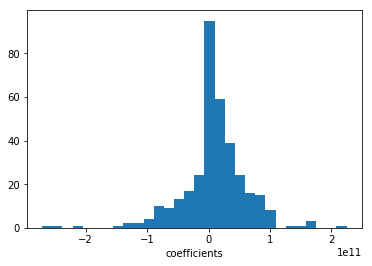

In [61]:
plt.hist(lr.coef_, bins=30)
plt.xlabel('coefficients')
plt.show()

Note the 1e10 factor on the x-axis (!) The high test score probably comes from numerical issues due to those large coefficients. **Let's try to fix the issue with regularization!**


### Grid search

This time, we will search for the best regularization strength using a technique called **grid search**. You can think of this technique as a simple exhaustive searching over a set of hyperparameters.

In our case, we only have one hyperparameter: the regularization strength. So we will simply iterate over a list of alpha values and pick the one with the best test score. However, in the next course, we will see cases where we need to **tune several hyperparameters**. In this case, we will generate a list of values for each one and test the different combinations i.e. searching over a grid of hyperparams. As you can guess, the number of combinations to test can quickly get very large. You will experiment with this issue in the next course, but you can already read about it in the Appendix at the end of this unit.

### Ridge Regression
Let's first create the list of alpha values and evaluate a ridge regression model for each one. Regularization strength affects the generization error on a **log-scale**. So we will use **np.logspace(a, b)** to generate sample alpha values i.e. instead of **np.linspace(a, b)**.

It's frequent to start with a range between a=1e-4 and b=1e4 for this hyperparameter, but we will use a larger range this time to see the effect of regularization with very large/small values.

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-10, 10, num=100):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/test sets
    gs_results.append({
        'alpha': alpha,
        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
        'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)),
        'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,test_mae,test_mse,train_mae,train_mse
0,1.000000e-10,17808.357167,0.006002,11145.427596,0.001412
1,1.592283e-10,17810.996332,0.006004,11145.427596,0.001412
2,2.535364e-10,17812.352557,0.006005,11145.427596,0.001412
3,4.037017e-10,17813.634385,0.006006,11145.427596,0.001412
4,6.428073e-10,17814.923214,0.006006,11145.427596,0.001412


*Note that we raise the predictions to power 10 for the MAE metric since we want to get a **score in dollars and not log-dollars** - remember that our model predicts the logarithm of the sale prices base 10.*

### Validation curves
A good way to visualize the results it by plotting the **validation curves** For each alpha, we plot the train and test scores to see which value minimizes the error.

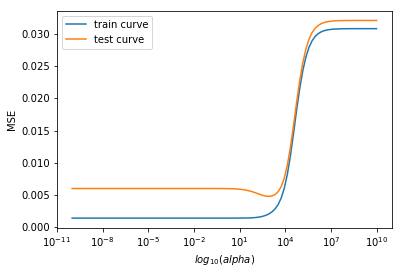

In [63]:
# Plot the validation curves
plt.semilogx(gs_results['alpha'], gs_results['train_mse'], label='train curve')
plt.semilogx(gs_results['alpha'], gs_results['test_mse'], label='test curve')
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

There are a few things to observe about this result.

- The optimal range of alpha values seems to be around 10e3
- The model starts overfitting when alpha is smaller than 10e2
- The models starts underfitting when alpha is larger than 10e4

It's also interesting to see that the test score reaches a plateau with alpha values above 10e6. This is the effect of regularization: when the regularization strength is too large, the model coefficient go to zero and the model always predicts the intercept term.

In [64]:
# Fit a model with a very strong regularization
strong_ridge = Ridge(alpha=10**10)
strong_ridge.fit(X_tr_rescaled, y_tr)

print('Largest coefficient: {:.1e}'.format(
    np.max(np.abs(strong_ridge.coef_))))
print('Intercept: {:.2f}'.format(
    strong_ridge.intercept_)) 

Largest coefficient: 1.8e-08
Intercept: 5.23


Since all coefficients are close to zero, the model always predicts the intercept term - 5.23 in this case. It's interesting to observe that this is equal to the mean - which is, as we saw in a previous unit, the constant prediction that minimizes the MSE score i.e. the mean baseline.

In [65]:
print('Mean target value: {:.2f}'.format(np.mean(y_tr)))

Mean target value: 5.23


On the left part of the plot, the model also reaches a plateau which corresponds to the performance of a non-regularized model without the numerical issues that we encountered above. It's interesting to note that a very small regularization factor can already solve those numerical issues in this case.

Let's retrieve the alpha with the best generalization i.e. the one that minimizes the test score.

In [66]:
# Get entry with the best test MSE
best_result = gs_results.loc[gs_results.test_mse.idxmin()]

# Print the details
print('Best alpha: {:.1e}'.format(best_result.alpha)) 
print('Test MSE: {:.4f}'.format(best_result.test_mse)) 
print('Test MAE: {:,.0f}$'.format(best_result.test_mae))

Best alpha: 8.5e+02
Test MSE: 0.0048
Test MAE: 15,671$


As we can see, the best alpha is 8.5e+2 with an test MSE score of 0.005. We cannot really interpret this result, so we also retrieve the corresponding MAE score - as we can see, the predictions from this model are, on average, 15,671 dollars away from the true price!

### Introduction to cross-validation

In the code from above, we found the best alpha value for a single train/test set split. This result shouldn't be too far from the true optimal alpha value since the train/test scores are evaluated on a large set of data points. **However, it's often a good idea to average the scores on different train/test splits to get more stable results. This is called cross-validation.**

We will learn more about the different cross-validation variants in the next course, but let's implement our own cross-validation strategy with a simple for loop

In [68]:
# Fit/test N models
gs_results = []
for run_idx in range(10):
    # Split into train/test sets
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.5, random_state=run_idx)

    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_te_rescaled = scaler.transform(X_te)

    # Grid search
    for alpha in np.logspace(1, 4, num=20):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr_rescaled, y_tr)

        # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)),
            'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
        })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,model,run_idx,test_mae,test_mse,train_mae,train_mse
0,10.000000,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0,17485.758076,0.005898,11151.125598,0.001416
1,14.384499,"Ridge(alpha=14.38449888287663, copy_X=True, fi...",0,17372.165040,0.005857,11161.657456,0.001419
2,20.691381,"Ridge(alpha=20.6913808111479, copy_X=True, fit...",0,17233.571836,0.005802,11176.962177,0.001424
3,29.763514,"Ridge(alpha=29.76351441631318, copy_X=True, fi...",0,17067.620448,0.005733,11198.863815,0.001431
4,42.813324,"Ridge(alpha=42.81332398719393, copy_X=True, fi...",0,16871.527796,0.005647,11233.772529,0.001442


In this code, we perform grid search on 10 different train/test splits by changing the random_state attribute. For each different split, we standardize the data using the train mean and standard deviations.

The gs_results now contains 10 times more entries than if we had used a single train/test set split.

Let's group the results by alpha value and compute the average scores.

In [69]:
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_te = gb_alpha.test_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_te = gb_alpha.test_mse.std()
alphas = mean_tr.index.values

# Get entry with the best mean test MSE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print('Best alpha: {:.1e}'.format(best_alpha)) # 5.5e+02
print('Test MSE: {:.4f}'.format(best_result.test_mse.mean())) # 0.0038
print('Test MAE: {:,.0f}$'.format(best_result.test_mae.mean())) 

Best alpha: 5.5e+02
Test MSE: 0.0038
Test MAE: 15,700$


This time, the best alpha value is 5.5e+02 with a mean test MSE of 0.0038 and a mean test MAE of 15,700 dollars which is not far from the values computed above.

Note that we also computed the standard deviation for the different alpha values to measure how much the scores vary around the mean. We can now include this information in the plot with the validation curves.

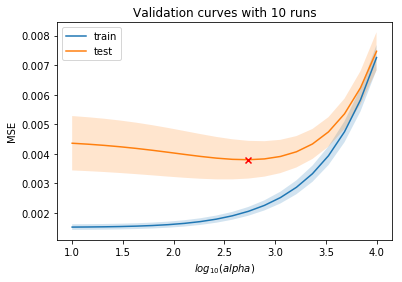

In [70]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train')
plt.plot(np.log10(alphas), mean_te, label='test')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs'.format(len(gs_results.groupby('run_idx'))))
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Summary
In this unit, we saw the basic idea behind hyperparameters and grid search. Here are a few takeaways.

- We want to find hyperparameters that minimize the **generalization error.**
- **Grid search** is an exhaustive search over the set of all possible combinations of hyperparameters.
- Plotting the **train/test curves** is a way to analyze and validate our models.

The goal of the next exercise is to improve the house prices from above by doing some basic feature engineering.

### Appendix - Note about complexity

The main issue with grid search is that it doesn't scale well to many hyperparameters. In fact, each time we add a parameter with 
$n$
 values, we need to test 
$n$
 times more models than before.
 
 general, we need to test 
$n^{p}$
 combinations when there are 
$p$
 parameters with 
$n$
 values each. Hence, it's better to have many values but few parameters than the opposite. For instance, it's better to have two hyperparameters with 
$n$
 values each than 
$n$
 hyperparameters with two values each
 
 There are several more advanced strategies such as **randomized search** that try to solve this issue and reduce the time needed to find the optimal combination of hyperparameters

### Appendix - Note about grid search range and border effects

The goal of a grid search is to find the optimal hyperparameter. But because of the complexity issue mentioned above, the grid search space needs to be restricted to a certain number of grid points, between a particular grid search range. For example, in the Ridge Regression example above, we specified the grid search range of the alpha value to be between 1 and 10'000 (e.g. np.logspace(1, 4, num=20).

In the example above this approach works well. The optimal alpha seems to lay somewhere around 5.5e+02. We either can now be happy with this result, or we could restrict the grid search further and fine tune the hyperparameters even more. In the Ridge Regression example this does not seem to be necessary.

But let's imagine the optimal alpha would have been found at 1, i.e. **at the border of our grid search range**. In this case it is not clear if 1 is the best alpha value or if we could minimize the error even more, if we would move the grid search range further to the left, i.e. below 1.

Example : 
https://d7whxh71cqykp.cloudfront.net/uploads/image/data/4287/grid_search_narrow.svg
https://d7whxh71cqykp.cloudfront.net/uploads/image/data/4288/grid_search_wide.png

1) Import data

2) Perform preprocessing (get dummies + fill missing values)

3) Create X and Y matrices

4) Split data into train and test

5) Scale the features

6) Apply the model